In [2]:
versioninfo()

Julia Version 1.8.5
Commit 17cfb8e65e (2023-01-08 06:45 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: 16 × AMD Ryzen 7 5800 8-Core Processor              
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, znver3)
  Threads: 1 on 16 virtual cores


In [102]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()
Pkg.status()
using LoopVectorization, Random, Plots, LinearAlgebra

  Activating project at `C:\Users\larry\Dropbox\zza\UCLA\academic\year 3\quarter 3\257\biostat-257-2023-spring\hw1`


Status `C:\Users\larry\Dropbox\zza\UCLA\academic\year 3\quarter 3\257\biostat-257-2023-spring\hw1\Project.toml`
  [bdcacae8] LoopVectorization v0.12.157
  [91a5bcdd] Plots v1.38.9


## Q1

**No handwritten homework reports are accepted for this course.**  We work with Git/GitHub.  Efficient and abundant use of Git, e.g., **frequent and well-documented** commits, is an important criterion for grading your homework.

1. If you don't have a GitHub account, apply for the [Student Developer Pack](https://education.github.com/pack) at GitHub using your UCLA email.

2. Create a **private** repository `biostat-257-2023-spring` and add `Hua-Zhou` and `parsajamshidian` (TA) as your collaborators.

3. Top directories of the repository should be `hw1`, `hw2`, ... You may create other branches for developing your homework solutions; but the `master` branch will be your presentation area. Put your homework submission files (Jupyter notebook `.ipynb`, html converted from notebook, all code and data set to reproduce results) in the `master` branch. 

4. After each homework due date, teaching assistant and instructor will check out your `master` branch for grading. Tag each of your homework submissions with tag names `hw1`, `hw2`, ...  Tagging time will be used as your submission time. That means if you tag your hw1 submission after deadline, penalty points will be deducted for late submission.  

5. Read the [style guide](https://github.com/invenia/BlueStyle) for Julia programming. Following rules in the style guide will be strictly enforced when grading: (1) four space indenting rule, (2) 92 charcter rule, (3) space after comma rule, (4) no space before comma rule, (5) space around binary operator rule.

### **Sol.**
1. done
2. done
3. done
4. done
5. done

## Q2

Let's check whether floating-point numbers obey certain algebraic rules. For 2-5, one counter-example suffices.

1. Associative rule for addition says `(x + y) + z == x + (y + z)`. Check association rule using `x = 0.1`, `y = 0.1` and `z = 1.0` in Julia. Explain what you find.

2. Do floating-point numbers obey the associative rule for multiplication: `(x * y) * z == x * (y * z)`?

3. Do floating-point numbers obey the distributive rule: `a * (x + y) == a * x + a * y`?  

4. Is `0 * x == 0` true for all floating-point number `x`? 

5. Is `x / a == x * (1 / a)` always true?

### **Sol.**

#### 1. 

In [7]:
x, y, z = 0.1, 0.1, 1.0
print("(x + y) + z = ", (x + y) + z, ";  x + (y + z) = ", x + (y + z))
(x + y) + z == x + (y + z)

(x + y) + z = 1.2;  x + (y + z) = 1.2000000000000002

false

Explain:

#### 2. 

In [8]:
print("(x * y) * z = ", (x * y) * z, ";  x * (y * z) = ", x * (y * z))
(x * y) * z == x * (y * z)

(x * y) * z = 0.010000000000000002;  x * (y * z) = 0.010000000000000002

true

Yes floating-point numbers obey the associative rule for multiplication

#### 3.

In [10]:
print("z * (x + y) = ", z * (x + y), ";  z * x + z * y = ", z * x + z * y)
(x * y) * z == x * (y * z)

z * (x + y) = 0.2;  z * x + z * y = 0.2

true

#### 4.

In [14]:
0 * Inf == 0

false

Then we can see `0 * x == 0` is not always true for all floating-point number `x`.

#### 5.

In [53]:
Random.seed!(257)
A = rand(100)
for i in 1:100
    if !(x / A[i] == x * (1 / A[i]))
        print(A[i])
        break
    end
end

0.47468221721270687

Then we can see `x / a == x * (1 / a)` is not always true (one example: `a = 0.47468221721270687`).

## Q3

Consider Julia function
```julia
function g(k)
    for i in 1:10
        k = 5k - 1
    end
    k
end
```
1. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Int64` input.   
2. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Float64` input.  
3. Compare the bitcode from questions 1 and 2. What do you find?  
4. Read Julia documentation on `@fastmath` and repeat the questions 1-3 on the function  

```julia
function g_fastmath(k)  
    @fastmath for i in 1:10  
        k = 5k - 1
    end
    k
end
```
Explain what does the macro `@fastmath` do? And why are the bitcodes for `g` and `g_fastmath` with `Float64` input different? (Hint: Q2)

## Q4

Create the vector `x = (0.988, 0.989, 0.990, ..., 1.010, 1.011, 1.012)`.   

1. Plot the polynomial `y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x - 1` at points `x`.  

2. Plot the polynomial `y = (x - 1)^7` at points `x`.  

3. Explain what you found.

### **Sol.**

#### 1. 

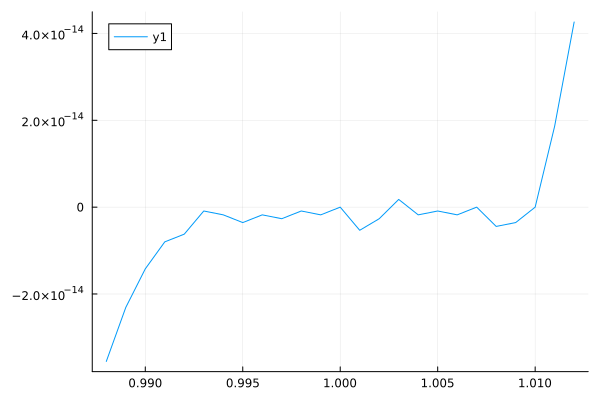

In [74]:
x = [0.988:0.001:1.012...]
function f1(x :: Real)
    x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x - 1
end
y1 = map(f1, x)
plot(x, y1)

#### 2.

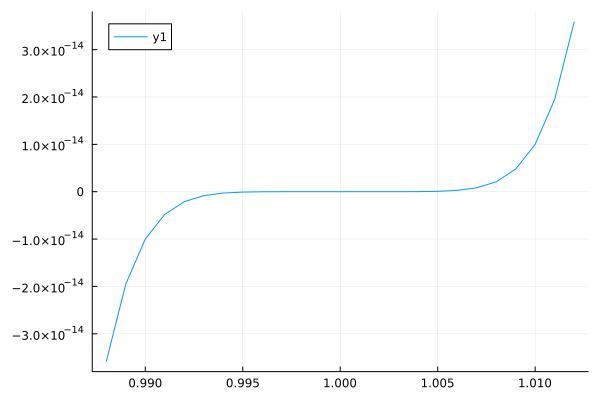

In [75]:
x = [0.988:0.001:1.012...]
function f2(x :: Real)
    (x - 1)^7
end
y2 = map(f2, x)
plot(x, y2)

#### 3.

Plot `y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x - 1` and `y = (x - 1)^7` together:

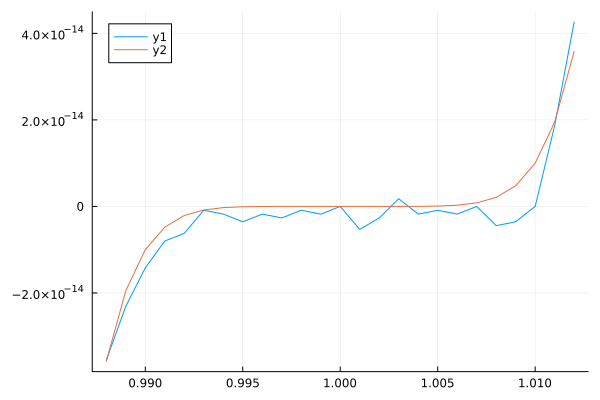

In [76]:
plot(x, [y1, y2])

We can find that 

## Q5

1. Show the **Sherman-Morrison formula**
$$
	(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1} = \mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular and $\mathbf{u} \in \mathbb{R}^n$. This formula supplies the inverse of the symmetric, rank-one  perturbation of $\mathbf{A}$.

2. Show the **Woodbury formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular, $\mathbf{U}, \mathbf{V} \in \mathbb{R}^{n \times m}$, and $\mathbf{I}_m$ is the $m \times m$ identity matrix. In many applications $m$ is much smaller than $n$. Woodbury formula generalizes Sherman-Morrison and is valuable because the smaller matrix $\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}$ is cheaper to invert than the larger matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

3. Show the **binomial inversion formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A}$ and $\mathbf{B}$ are nonsingular.

4. Show the identity
$$
	\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}).
$$
This formula is useful for evaluating the density of a multivariate normal with covariance matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

**Hint**: 1 and 2 are special cases of 3. For 4, show that
$$
\begin{pmatrix}
- \mathbf{A} & \mathbf{O} \\
\mathbf{O} & \mathbf{I} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}
\end{pmatrix} = \begin{pmatrix}
\mathbf{I} & \mathbf{O} \\
\mathbf{V}^T \mathbf{A}^{-1} & \mathbf{I}
\end{pmatrix} \begin{pmatrix}
- \mathbf{A} & \mathbf{U} \\
\mathbf{V}^T & \mathbf{I}
\end{pmatrix} \begin{pmatrix}
\mathbf{I} & \mathbf{A}^{-1} \mathbf{U} \\
\mathbf{O} & \mathbf{I}
\end{pmatrix}.
$$

### **Sol.**

#### 3.
Proof:

Firstly, we can

$$
\begin{aligned}
& \left(A+U B V^{\top}\right)\left(A^{-1}-A^{-1} U\left(B^{-1}+V^{\top} A^{-1} U\right)^{-1} V^{\top} A^{-1}\right) \\
= & I+U B V^{\top} A^{-1}-U\left(B^{-1}+V^{\top} A^{-1} U\right)^{-1} V^{\top} A^{-1}-U B V^{\top} A^{-1} U\left(B^{-1}+V^{\top} A^{-1} U\right)^{-1} V^{\top} A^{-1} \\
= & I+U B V^{\top} A^{-1}-\left(U+U B V^{\top} A^{-1} U\right)\left(B^{-1}+V^{\top} A^{-1} U\right)^{-1} V^{\top} A^{-1} \\
= & I+U B V^{\top} A^{-1}-U B\left(B^{-1}+V^{\top} A^{-1} U\right)\left(B^{-1}+V^{\top} A^{-1} U\right)^{-1} V^{\top} A^{-1} \\
= & I+U B V^{\top} A^{-1}-U B V^{\top} A^{-1} \\
= & I
\end{aligned}
$$

Since $\left(A+U B V^{\top}\right)^{-1}$ exist, we have,

$$
\begin{aligned}
\left(A+U B V^{\top}\right)^{-1} I & =(A+U B V)^{-1}\left(A+U B U^{\top}\right)\left(A^{-1}-A^{-1} U\left(B^{-1}+U^{\top} A^{-1} U\right)^{-1} U^{\top} A^{-1}\right) \\
\left(A+U B V^{\top}\right)^{-1} & \left.=A^{-1}-A^{-1} U\left(B^{-1}+V^{\top} A^{\top} U\right)^{-1} V^{\top} A^{-1}\right.
\end{aligned}
$$

#### 1.

Based on what we derived in Q3, we set $\mathbf{u}=U, \mathbf{u}^{T}=V$ and $\mathbf{I}_1=B$, then we can get,

$$
	(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1} = \mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1},
$$

where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular and $\mathbf{u} \in \mathbb{R}^n$. This formula supplies the inverse of the symmetric, rank-one  perturbation of $\mathbf{A}$.

#### 2.

Based on what we derived in Q3, we set $\mathbf{I}_m=B$, then we can get,

$$
	(\mathbf{A} + \mathbf{U} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$

where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular, $\mathbf{U}, \mathbf{V} \in \mathbb{R}^{n \times m}$, and $\mathbf{I}_m$ is the $m \times m$ identity matrix. 

#### 4.

Firstly, we can derive the relationship, 
$$
\begin{aligned}
& \left(\begin{array}{cc}
I & 0 \\
V^{\top} A^{-1} & I
\end{array}\right)\left(\begin{array}{cc}
-A & U \\
V^{\top} & I
\end{array}\right)\left(\begin{array}{cc}
I & A^{-1} U \\
0 & I
\end{array}\right) \\
=& \left(\begin{array}{cc}
-A& U  \\
-V^{-} A^{-1} A+V^{\top} &V^{\top} A^{-1} U+I\end{array}\right)\left(\begin{array}{cc}
I & A^{-1} U \\
0 & I
\end{array}\right) \\
=& \left(\begin{array}{cc}
-A & U \\
0 & V^{\top} A^{-1} U+I
\end{array}\right)\left(\begin{array}{cc}
I & A^{-1} U \\
0 & I
\end{array}\right) \\
=& \left(\begin{array}{cc}
-A & -A A^{-1} U+U \\
0 & V^{\top} A^{-1} U+I
\end{array}\right) \\
 =&\left(\begin{array}{cc}
-A & 0 \\
0 & I+V^{\top} A^{-1} U
\end{array}\right)
\end{aligned}
$$

Then we know

$$
\begin{aligned}
 \operatorname{det}\left(\begin{array}{cc}
-A & 0 \\
0 & I+V^{\top} A^{-1} U
\end{array}\right)&=\operatorname{det}\left(\begin{array}{cc}
I & 0 \\
V^{\top} A^{-1} & I
\end{array}\right)\left(\begin{array}{cc}
-A & U \\
V^{\top} & I
\end{array}\right)\left(\begin{array}{cc}
I & A^{-1} U \\
0 & I
\end{array}\right) \\
 \operatorname{det}(-A) \operatorname{det}\left(I+V^{\top} A^{-1} U\right)&= 1 * \operatorname{det}\left(\begin{array}{cc}
-A & U \\
V^{\top} & I
\end{array}\right)* 1 \\
 \operatorname{det}\left(A+U V^{\top}\right)&=\operatorname{det}(A) \operatorname{det}\left(I+V^{\top} A^{-1} U\right)
\end{aligned}
$$

## Q6

Demonstrate the following facts about triangular and orthogonal matrices in Julia (one numerical example for each fact). Mathematically curious ones are also encouraged to prove them. 

Note a unit triangular matrix is a triangular matrix with all diagonal entries being 1.

1. The product of two upper (lower) triangular matrices is upper (lower) triangular.

2. The inverse of an upper (lower) triangular matrix is upper (lower) triangular.

3. The product of two unit upper (lower) triangular matrices is unit upper (lower) triangular.

4. The inverse of a unit upper (lower) triangular matrix is unit upper (lower) triangular.

5. An orthogonal upper (lower) triangular matrix is diagonal. (You just need to prove this.)

6. The product of two orthogonal matrices is orthogonal.

#### 1.

In [104]:
Random.seed!(257)
upp1 = UpperTriangular(randn(3,3))
upp2 = UpperTriangular(randn(3,3))
upp1 * upp2

3×3 UpperTriangular{Float64, Matrix{Float64}}:
 1.08459  -0.405428  -0.0996119
  ⋅        1.33552   -0.980334
  ⋅         ⋅        -2.31091

## Q7

Let the $n \times n$ matrix `H` have elements `H[i, j] = 1 / (i + j - 1)`.  

1. Write a function `h(n)` that outputs $n \times n$ matrix `H`. Try at least 4 ways, e.g., $ij$-looping, $ji$-looping, [comprehension](https://docs.julialang.org/en/v1/manual/arrays/#man-comprehensions), and vectorization (R style). Compute and print `H` for `n = 5`.   

2. Compare their efficiencies (using `BenchmarkTools`) at `n = 5000`.

### **Sol.**

#### 1.

In [91]:
n = 5
H = Matrix{Float64}(undef, n, n)
function hij(n :: Int, H :: Matrix{Float64})
    @turbo for i in 1:n, j in 1:n
        H[i, j] = 1 / (i + j - 1)
    end
    H
end
hij(5, H)

5×5 Matrix{Float64}:
 1.0       0.5       0.333333  0.25      0.2
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125
 0.2       0.166667  0.142857  0.125     0.111111

In [92]:
function hji(n :: Int, H :: Matrix{Float64})
    @turbo for j in 1:n, i in 1:n
        H[i, j] = 1 / (i + j - 1)
    end
    H
end
hji(5, H)

5×5 Matrix{Float64}:
 1.0       0.5       0.333333  0.25      0.2
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125
 0.2       0.166667  0.142857  0.125     0.111111

In [101]:
function hcom(n :: Int, H :: Matrix{Float64})
    [1 / (i + j - 1) for i in 1:n, j in 1:n]
end
@turbo hcom(5, H)

5×5 Matrix{Float64}:
 1.0       0.5       0.333333  0.25      0.2
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125
 0.2       0.166667  0.142857  0.125     0.111111

In [ ]:
V = [i ]